In [1]:

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42) 

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [3]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
circles.label.value_counts()

,count
label,
1,500
0,500


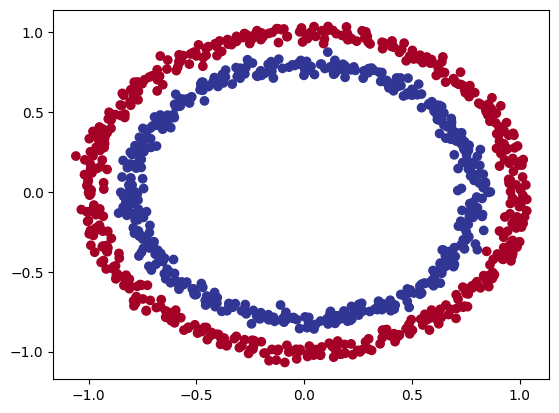

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.ndim, y.ndim, X.dtype, y.dtype, X.shape, y.shape

(2, 1, dtype('float64'), dtype('int64'), (1000, 2), (1000,))

In [ ]:
type(X)

numpy.ndarray

In [8]:
import torch
from torch import nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X.device

device(type='cpu')

In [13]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4618,  0.3897],
                      [ 0.2683, -0.2931],
                      [-0.2385,  0.4670],
                      [-0.3892, -0.0080],
                      [ 0.3630, -0.1621]])),
             ('0.bias', tensor([ 0.4010, -0.4575, -0.2376,  0.5312, -0.6058])),
             ('1.weight',
              tensor([[-0.3039, -0.1154,  0.1936,  0.0449,  0.0179]])),
             ('1.bias', tensor([0.0299]))])

In [15]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0900],
        [-0.0689],
        [-0.1097],
        [-0.0846],
        [-0.0530],
        [-0.0406],
        [-0.0260],
        [-0.0192],
        [-0.1120],
        [-0.0669]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [16]:
loss_fn = nn.BCEWithLogitsLoss()
criteria = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [ ]:
def accuracy(y_true, y_pred):
    return torch.eq(y_true, y_pred).sum().item() / len(y_true)

In [18]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)
y_logits

tensor([[-0.0900],
        [-0.0689],
        [-0.1097],
        [-0.0846],
        [-0.0530],
        [-0.0406],
        [-0.0260],
        [-0.0192],
        [-0.1120],
        [-0.0669],
        [-0.0947],
        [-0.0817],
        [-0.0205],
        [-0.1042],
        [-0.1204],
        [-0.0322],
        [-0.0504],
        [-0.1061],
        [-0.1010],
        [-0.1145],
        [-0.0690],
        [-0.0200],
        [-0.1060],
        [-0.1147],
        [-0.0370],
        [-0.0245],
        [-0.0869],
        [-0.0286],
        [-0.1246],
        [-0.0955],
        [-0.0387],
        [-0.0395],
        [-0.0912],
        [-0.0702],
        [-0.0961],
        [-0.0638],
        [-0.0838],
        [-0.1065],
        [-0.0791],
        [-0.1005],
        [-0.1085],
        [-0.1142],
        [-0.0499],
        [-0.0526],
        [-0.0911],
        [-0.0602],
        [-0.0448],
        [-0.0702],
        [-0.0678],
        [-0.0457],
        [-0.0862],
        [-0.0903],
        [-0.

In [19]:
probs = torch.sigmoid(y_logits)
probs

tensor([[0.4775],
        [0.4828],
        [0.4726],
        [0.4789],
        [0.4868],
        [0.4899],
        [0.4935],
        [0.4952],
        [0.4720],
        [0.4833],
        [0.4763],
        [0.4796],
        [0.4949],
        [0.4740],
        [0.4699],
        [0.4920],
        [0.4874],
        [0.4735],
        [0.4748],
        [0.4714],
        [0.4828],
        [0.4950],
        [0.4735],
        [0.4714],
        [0.4908],
        [0.4939],
        [0.4783],
        [0.4929],
        [0.4689],
        [0.4762],
        [0.4903],
        [0.4901],
        [0.4772],
        [0.4825],
        [0.4760],
        [0.4841],
        [0.4791],
        [0.4734],
        [0.4802],
        [0.4749],
        [0.4729],
        [0.4715],
        [0.4875],
        [0.4869],
        [0.4772],
        [0.4849],
        [0.4888],
        [0.4825],
        [0.4831],
        [0.4886],
        [0.4785],
        [0.4774],
        [0.4934],
        [0.4851],
        [0.4918],
        [0

In [20]:
y_preds = probs.round()

In [21]:
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [22]:
# Train loop

epochs = 100

for epoch in range(epochs):
    model_0.train()
    logits = model_0(X_train)
    loss = loss_fn(torch.squeeze(logits), y_train)
    print("**Train**")
    print(loss)
    criteria.zero_grad()
    loss.backward()

    criteria.step()

    model_0.eval()
    with torch.inference_mode():
        logits = model_0(X_test)

        loss = loss_fn(torch.squeeze(logits), y_test)
        print("**Test**")
        print(loss)
        print(accuracy(y_test, logits.round().reshape(200)))
        print(y_test)
        print(logits.round())

**Train**
tensor(0.6938, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
**Test**
tensor(0.6945)
0.5
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])
t

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

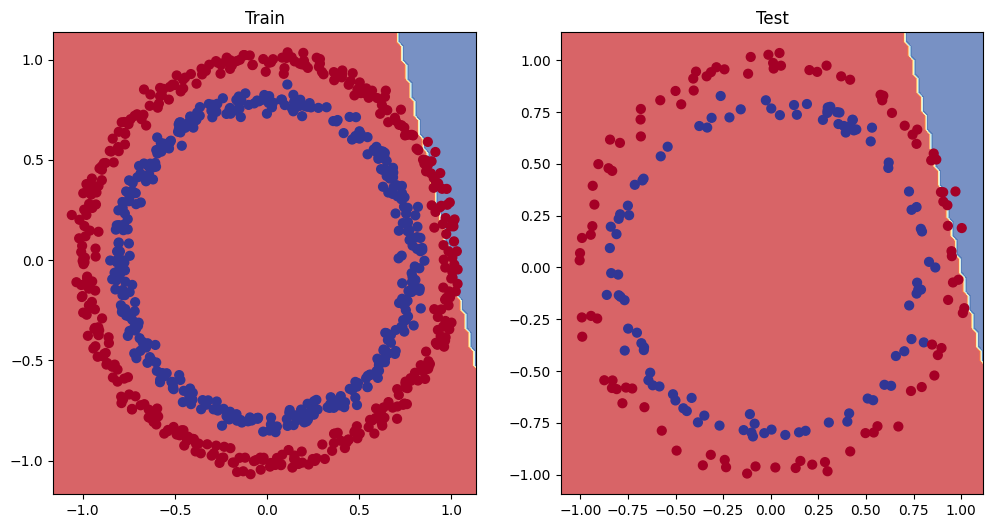

In [24]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [25]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=5)
        self.layer3 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        z = self.layer1(x)
        z = self.layer2(z)
        z = self.layer3(z)
        return z
    
model_1 = CircleModelV2()

In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [27]:
torch.manual_seed(42)
epochs = 60
train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch_list = []

for epoch in range(epochs):
    epoch_list.append(epoch)
    model_1.train()

    logits = model_1(X_train)

    loss = loss_fn(y_train, logits.squeeze())
    train_loss.append(loss.detach().numpy())
    train_acc.append(accuracy(y_true=y_train, y_pred=logits.reshape(-1).round()))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        logits = model_1(X_test)

        loss = loss_fn(y_test, logits.squeeze())
        test_loss.append(loss.detach().numpy())
        test_acc.append(accuracy(y_true=y_test, y_pred=logits.reshape(-1)))
        optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"*******{epoch}*******")
        print(f"Train loss: {train_loss[-1]} | Train accuracy: {train_acc[-1]}")
        print(f"Test loss: {test_loss[-1]} | Test accuracy: {test_acc[-1]}")

*******0*******
Train loss: 0.9994512796401978 | Train accuracy: 0.5
Test loss: 0.9471828937530518 | Test accuracy: 0.0
*******10*******
Train loss: 0.3597700893878937 | Train accuracy: 0.36125
Test loss: 0.25381985306739807 | Test accuracy: 0.0
*******20*******
Train loss: -1.775354266166687 | Train accuracy: 0.0
Test loss: -2.3516149520874023 | Test accuracy: 0.0
*******30*******
Train loss: -52.50087356567383 | Train accuracy: 0.0
Test loss: -96.41667175292969 | Test accuracy: 0.0
*******40*******
Train loss: -5.729610985891152e+29 | Train accuracy: 0.0
Test loss: nan | Test accuracy: 0.0
*******50*******
Train loss: nan | Train accuracy: 0.0
Test loss: nan | Test accuracy: 0.0


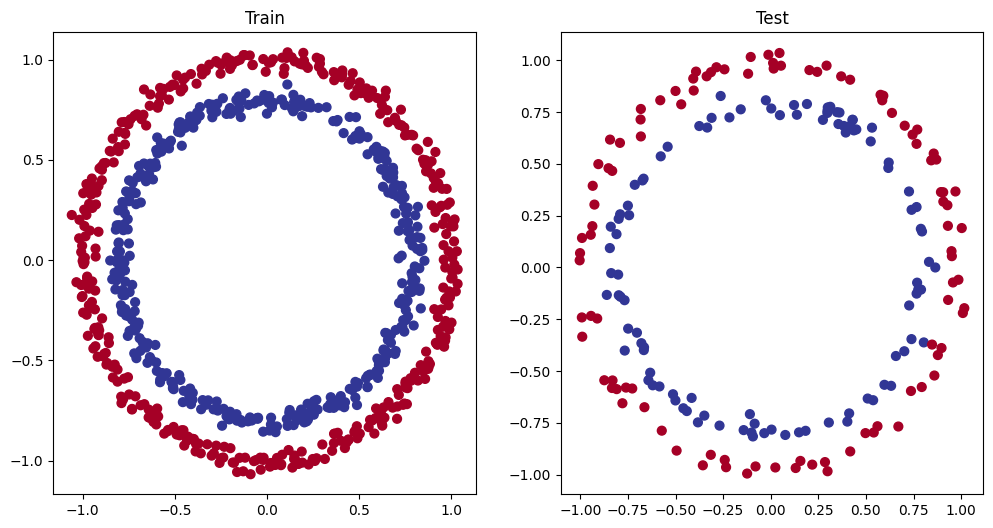

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

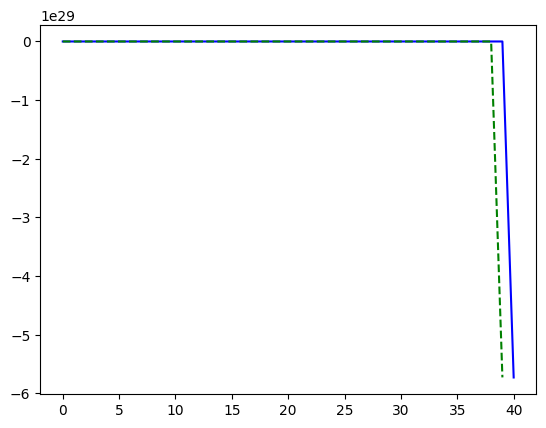

In [29]:
plt.plot(epoch_list, train_loss, "b-", label="Train Loss")
plt.plot(epoch_list, test_loss, "g--", label="Test Loss")
plt.show()

In [30]:
from torch import nn


class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [31]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [32]:
torch.manual_seed(42)
epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(
        torch.sigmoid(y_logits)
    )  
    loss = loss_fn(
        y_logits,
        y_train
    )
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(
            torch.sigmoid(test_logits)
        ) 
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%"
        )

Epoch: 0 | Loss: 0.69295, Accuracy: 0.50% | Test Loss: 0.69319, Test Accuracy: 0.50%
Epoch: 100 | Loss: 0.69115, Accuracy: 0.53% | Test Loss: 0.69102, Test Accuracy: 0.53%
Epoch: 200 | Loss: 0.68977, Accuracy: 0.53% | Test Loss: 0.68940, Test Accuracy: 0.55%
Epoch: 300 | Loss: 0.68795, Accuracy: 0.53% | Test Loss: 0.68723, Test Accuracy: 0.56%
Epoch: 400 | Loss: 0.68517, Accuracy: 0.53% | Test Loss: 0.68411, Test Accuracy: 0.56%
Epoch: 500 | Loss: 0.68102, Accuracy: 0.53% | Test Loss: 0.67941, Test Accuracy: 0.56%
Epoch: 600 | Loss: 0.67515, Accuracy: 0.55% | Test Loss: 0.67285, Test Accuracy: 0.56%
Epoch: 700 | Loss: 0.66659, Accuracy: 0.58% | Test Loss: 0.66322, Test Accuracy: 0.59%
Epoch: 800 | Loss: 0.65160, Accuracy: 0.64% | Test Loss: 0.64757, Test Accuracy: 0.68%
Epoch: 900 | Loss: 0.62362, Accuracy: 0.74% | Test Loss: 0.62145, Test Accuracy: 0.79%
Epoch: 1000 | Loss: 0.56818, Accuracy: 0.88% | Test Loss: 0.57378, Test Accuracy: 0.86%
Epoch: 1100 | Loss: 0.48153, Accuracy: 0.94%

In [33]:

model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

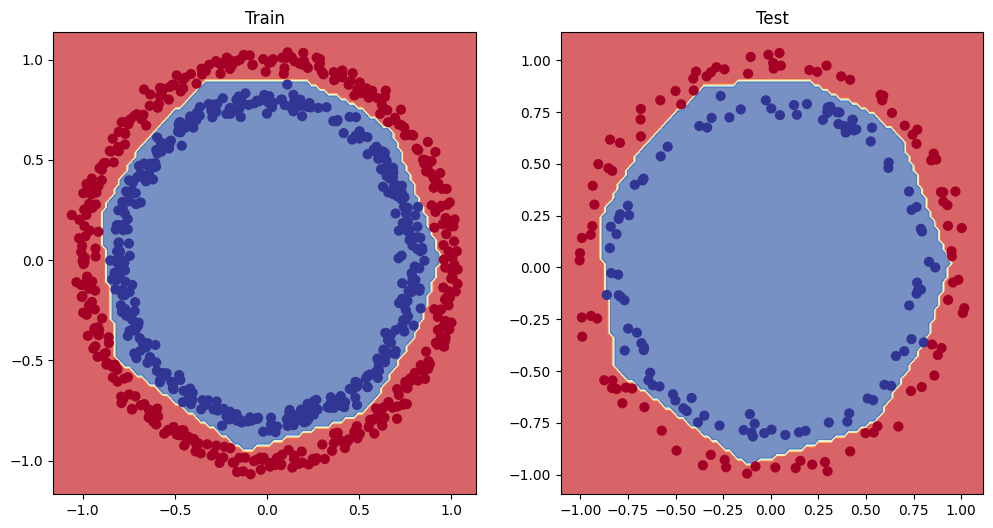

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)  
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) 

In [35]:
from sklearn.datasets import make_blobs

In [36]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [37]:
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES, 
    cluster_std=1.5,  
    random_state=RANDOM_SEED,
)

In [38]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED
)

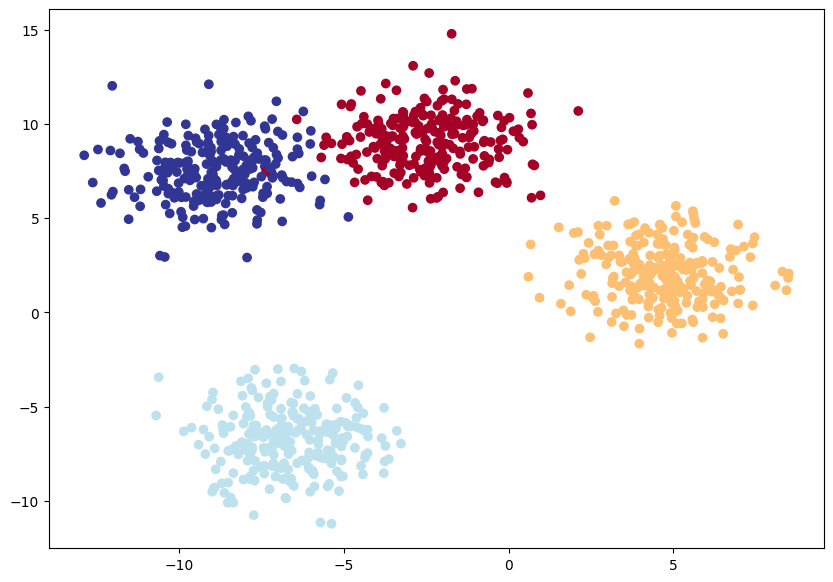

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [41]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(
                in_features=hidden_units, out_features=output_features
            ),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(
    input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8
).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

    model_4.train()

    y_logits = model_4(X_blob_train) 
    y_pred = torch.softmax(y_logits, dim=1).argmax(
        dim=1
    )  
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()
    
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%"
        )

AttributeError: 'numpy.ndarray' object has no attribute 'to'